# Study Overview

In this study, we are trying to analyze the psychophysiological data i.e. EDA and Temperature in 2 scenarios: 

* How EDA varies when the person is showering on his own and when the person is showering when the other is present.


      -whether the perceived pain and stress is less when the partner is present
* How EDA is changing over time while showering 
* How EDA and HR differ over the test periods (on day basis)

# Import Library

In [1]:
import numpy as np 
# import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cvxEDA
import datetime
from scipy import stats
from mpl_toolkits import mplot3d
import pylab as pl

sns.set(color_codes = True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load the data

## EDA

### FL

In [2]:
# Sampling frequency 4Hz ~= 0.25s
fl_eda = pd.read_csv('data/4_25/fl/EDA.csv' , header= None)
fl_eda.columns  = ['eda']
fl_eda_freq = fl_eda.iloc[1].values
print(len(fl_eda))
print('freq: ', fl_eda_freq)
fl_eda.head(10)

614000
freq:  [4.]


,eda
0,1.524628e+09
1,4.000000e+00
2,0.000000e+00
3,4.740600e-02
4,8.456300e-02
5,8.328200e-02
6,8.712500e-02
7,8.968800e-02
8,1.101880e-01
9,1.178750e-01


In [3]:
fl_init_time = datetime.datetime.utcfromtimestamp(fl_eda.iloc[0]).strftime('%Y-%m-%d %H:%M:%S')
fl_init_time

'2018-04-25 03:46:33'

In [4]:
fl_eda = fl_eda.iloc[2:]
fl_eda.head(5)

,eda
2,0.000000
3,0.047406
4,0.084563
5,0.083282
6,0.087125


In [5]:
#create index 
fl_time_eda = pd.date_range(start=fl_init_time, periods=len(fl_eda), freq=str(1/int(fl_eda_freq))+'S')
fl_time_eda

DatetimeIndex([       '2018-04-25 03:46:33', '2018-04-25 03:46:33.250000',
               '2018-04-25 03:46:33.500000', '2018-04-25 03:46:33.750000',
                      '2018-04-25 03:46:34', '2018-04-25 03:46:34.250000',
               '2018-04-25 03:46:34.500000', '2018-04-25 03:46:34.750000',
                      '2018-04-25 03:46:35', '2018-04-25 03:46:35.250000',
               ...
                      '2018-04-26 22:24:50', '2018-04-26 22:24:50.250000',
               '2018-04-26 22:24:50.500000', '2018-04-26 22:24:50.750000',
                      '2018-04-26 22:24:51', '2018-04-26 22:24:51.250000',
               '2018-04-26 22:24:51.500000', '2018-04-26 22:24:51.750000',
                      '2018-04-26 22:24:52', '2018-04-26 22:24:52.250000'],
              dtype='datetime64[ns]', length=613998, freq='250L')

In [6]:
fl_eda = fl_eda.set_index(fl_time_eda, drop =True)
fl_eda.head()

,eda
2018-04-25 03:46:33.000,0.000000
2018-04-25 03:46:33.250,0.047406
2018-04-25 03:46:33.500,0.084563
2018-04-25 03:46:33.750,0.083282
2018-04-25 03:46:34.000,0.087125


In [7]:
# eda = eda.rolling(4).sum()
fl_eda = fl_eda.iloc[::4,:]
fl_eda = fl_eda.dropna()
print(len(fl_eda))
fl_eda.head()

153500


,eda
2018-04-25 03:46:33,0.000000
2018-04-25 03:46:34,0.087125
2018-04-25 03:46:35,0.119157
2018-04-25 03:46:36,0.103782
2018-04-25 03:46:37,0.094813


### HW

In [ ]:
# Sampling frequency 4Hz ~= 0.25s
hw_eda = pd.read_csv('data/4_25/hw/EDA.csv', header= None)
hw_eda.columns  = ['eda']
hw_eda_freq = hw_eda.iloc[1].values
print(len(hw_eda))
print('freq: ', hw_eda_freq)
hw_eda.tail(10)

In [ ]:
hw_init_time = datetime.datetime.utcfromtimestamp(hw_eda.iloc[0]).strftime('%Y-%m-%d %H:%M:%S')
hw_init_time

In [ ]:
hw_eda = hw_eda.iloc[2:]
hw_eda.head(5)

## EDA Analysis

## CR 

In [8]:
y = np.asarray(fl_eda.eda)
y[:10]

array([0.      , 0.087125, 0.119157, 0.103782, 0.094813, 0.099938,
       0.09225 , 0.066625, 0.075594, 0.082   ])

     pcost       dcost       gap    pres   dres
 0: -7.5401e+04 -7.4133e+04  8e+05  8e+02  9e-01
 1: -7.5712e+04 -2.1186e+05  2e+05  1e+02  2e-01
 2: -7.5855e+04 -1.4466e+05  7e+04  5e+01  6e-02
 3: -7.5847e+04 -1.1546e+05  4e+04  2e+01  2e-02
 4: -7.5780e+04 -9.6702e+04  2e+04  8e+00  1e-02
 5: -7.5722e+04 -9.4064e+04  2e+04  6e+00  7e-03
 6: -7.5737e+04 -8.2928e+04  7e+03  2e+00  3e-03
 7: -7.5698e+04 -8.2355e+04  7e+03  2e+00  2e-03
 8: -7.5718e+04 -7.9412e+04  4e+03  9e-01  1e-03
 9: -7.5684e+04 -7.9061e+04  3e+03  8e-01  9e-04
10: -7.5791e+04 -7.7379e+04  2e+03  3e-01  4e-04
11: -7.5832e+04 -7.6940e+04  1e+03  2e-01  2e-04
12: -7.6167e+04 -7.6496e+04  3e+02  4e-02  4e-05
13: -7.6268e+04 -7.6452e+04  2e+02  2e-02  2e-05
14: -7.6339e+04 -7.6436e+04  1e+02  7e-03  8e-06
15: -7.6381e+04 -7.6428e+04  5e+01  3e-03  3e-06
16: -7.6395e+04 -7.6425e+04  3e+01  1e-03  1e-06
17: -7.6409e+04 -7.6423e+04  1e+01  3e-04  4e-07
18: -7.6410e+04 -7.6422e+04  1e+01  3e-04  3e-07
19: -7.6415e+04 -7.64

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


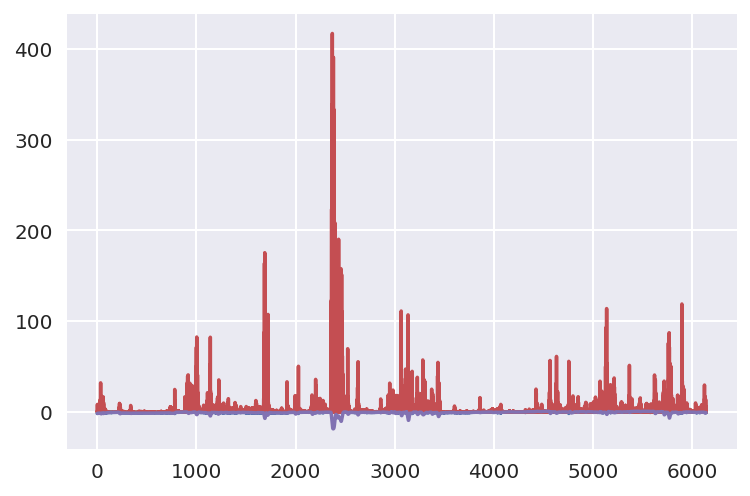

In [9]:
yn = (y - y.mean()) / y.std()
Fs = 25.
[r, p, t, l, d, e, obj] = cvxEDA.cvxEDA(yn, 1./Fs)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


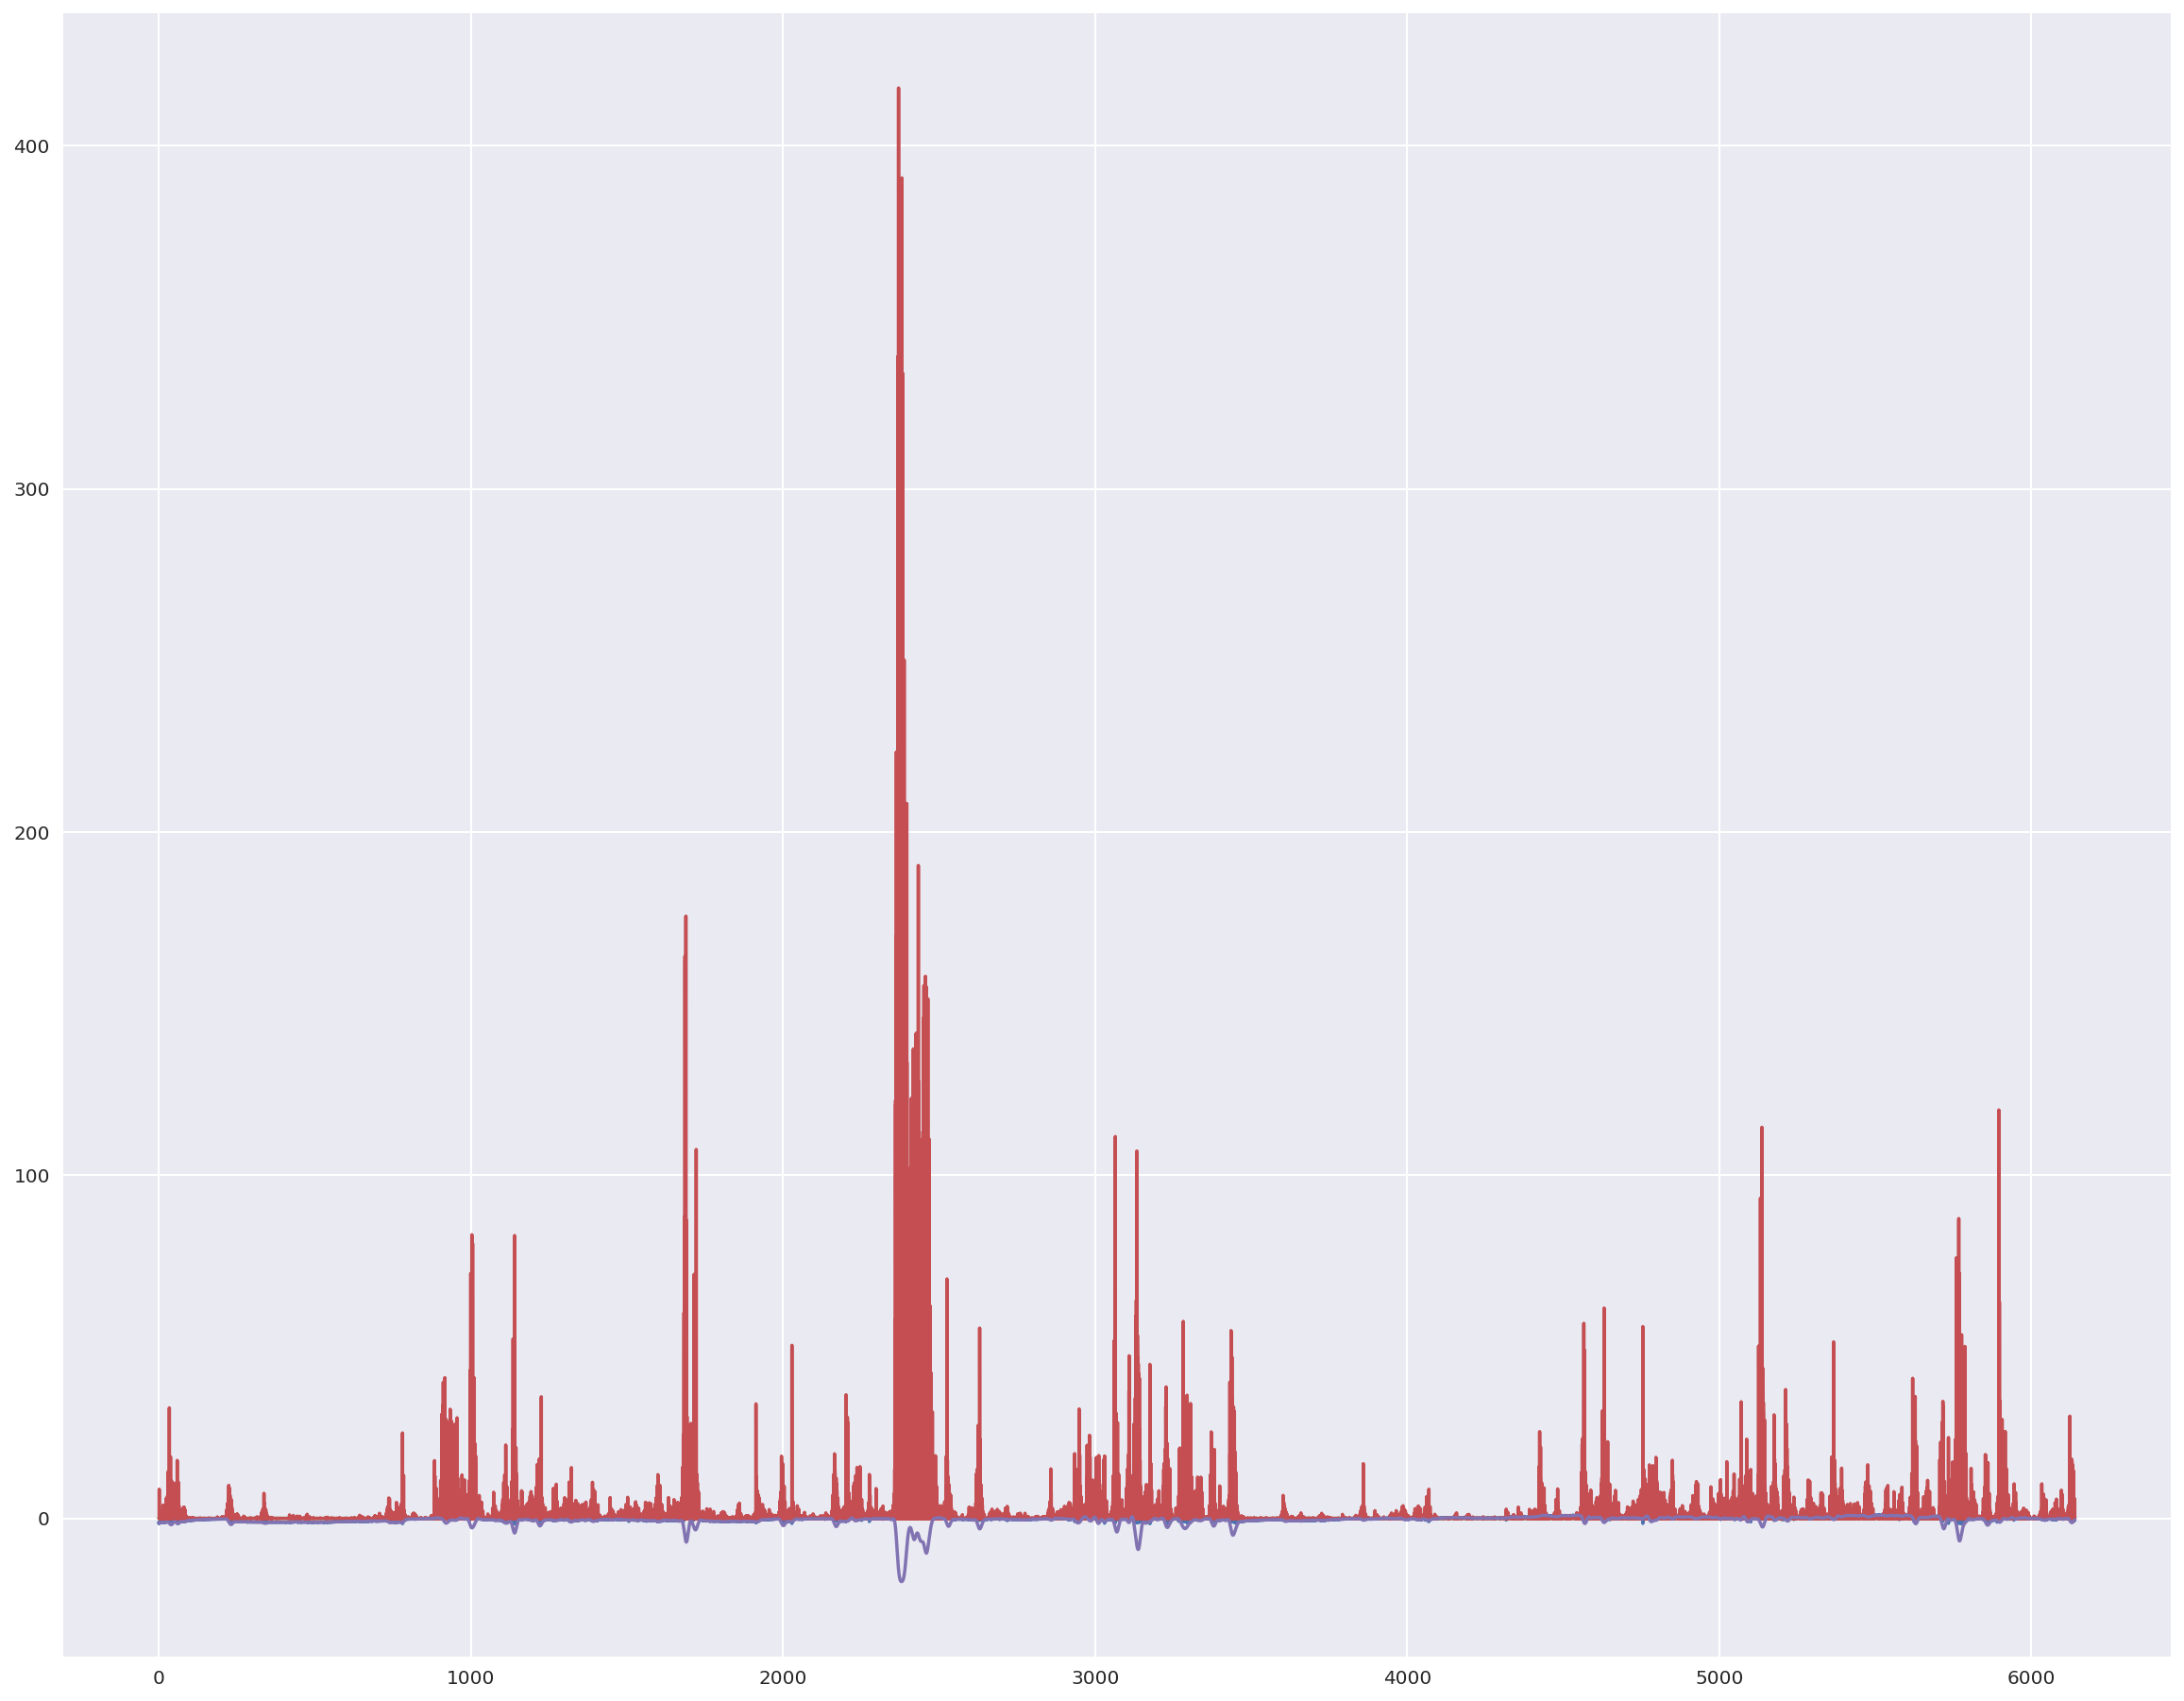

In [10]:
pl.rcParams['figure.figsize'] = (20, 16)
tm = pl.arange(1., len(y)+1.) / Fs
pl.hold(True)
pl.plot(tm, yn)
pl.plot(tm, r)
pl.plot(tm, p)
pl.plot(tm, t)
pl.show()